In [1]:
import sys
import os

# Get the absolute path of parent folder
current_dir = os.path.abspath("")
parent_dir = os.path.join(current_dir, os.pardir)

# Add to sys.path
sys.path.append(parent_dir)

In [2]:
import ml_combat as ml
from ml_combat import data
from ml_combat.MetaModel import MetaModel
from sklearn.linear_model import LinearRegression

In [3]:
from prophet import Prophet
import pandas as pd
import numpy as np

In [4]:
df = ml.data.get_training_flattened()

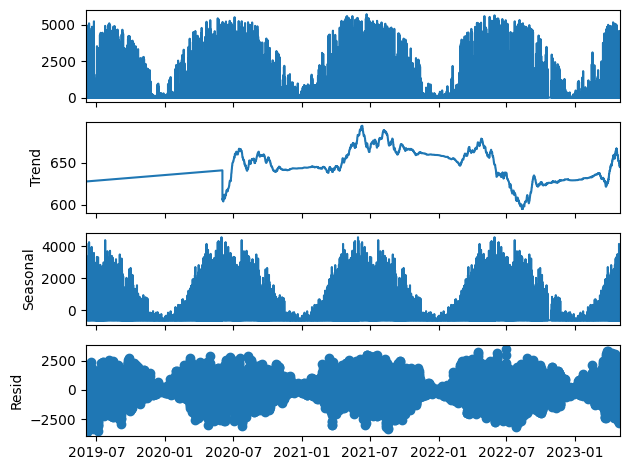

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = df[df.location == "A"].set_index('ds')[['y']].dropna()
result = seasonal_decompose(series, period=365*24, model='additive', extrapolate_trend='freq', two_sided=False)
result.plot()
pyplot.show()

<Axes: xlabel='ds'>

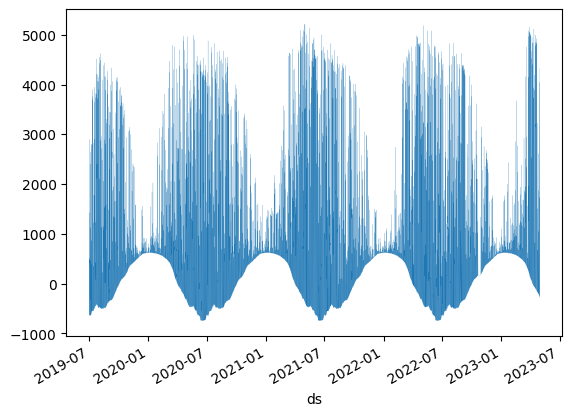

In [6]:
(result.observed - result.seasonal.rolling(28*24).mean()).plot(linewidth=0.1)

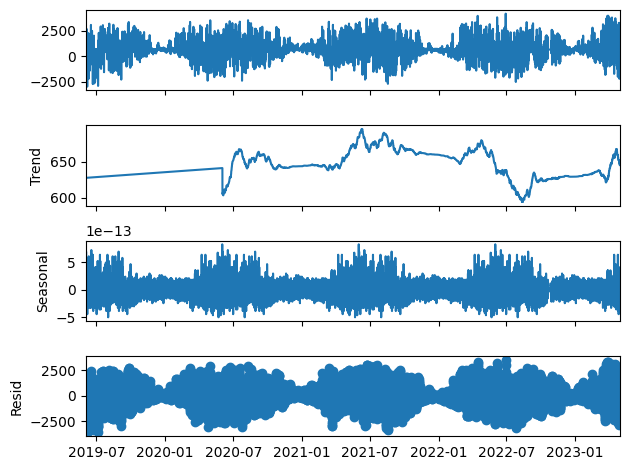

In [7]:
result = seasonal_decompose(result.trend + result.resid, period=365*24, model='additive', extrapolate_trend='freq', two_sided=False)
result.plot()
pyplot.show()

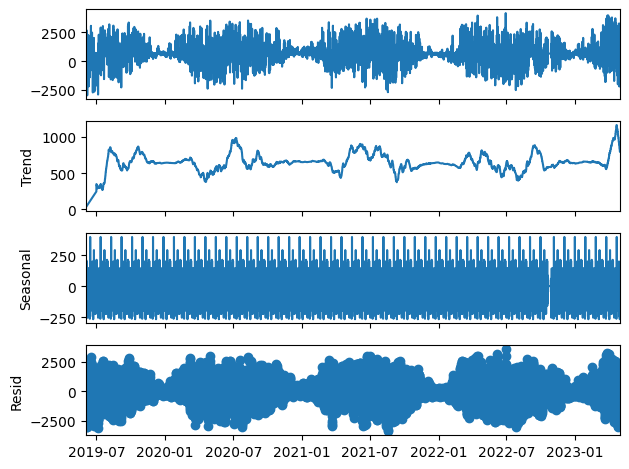

In [8]:
result = seasonal_decompose(result.trend + result.resid, period=28*24, model='additive', extrapolate_trend='freq', two_sided=False)
result.plot()
pyplot.show()

In [9]:
df = ml.data.get_training_flattened()
df['total_rad_1h:J'] = df['diffuse_rad_1h:J'] + df['direct_rad_1h:J']
df = df[df.location == "A"].copy()
df.dropna('index', subset=['total_rad_1h:J', 'y'], inplace=True)

/var/folders/rn/zrxftcb56xg254wsfbhrtbt80000gn/T/ipykernel_31017/509686405.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df.dropna('index', subset=['total_rad_1h:J', 'y'], inplace=True)


In [10]:
model = LinearRegression()

# Fit the model to the training data
model.fit(df['total_rad_1h:J'].values.reshape(-1, 1), df.y.values.reshape(-1, 1))

# Make predictions on the test data
y_pred = model.predict(df['total_rad_1h:J'].values.reshape(-1, 1))
df['yhat'] = y_pred
df['resid'] = df.y - df.yhat

<Axes: xlabel='t_1000hPa:K', ylabel='resid'>

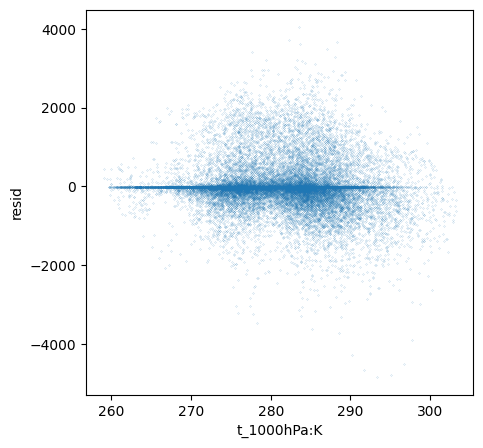

In [11]:
df[df.resid != 0].plot.scatter("t_1000hPa:K", "resid", s=0.01, figsize=(5,5))#, ylim=(-10, 10))

In [12]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [14]:
df = ml.data.get_training_flattened()

In [ ]:
train_data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="item_id",
    timestamp_column="timestamp"
)